In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/data.csv")

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df.info()
# df.columns
# df.shape
# df.describe()
# df.select_dtypes(include="number")
# df.select_dtypes(include="object")

<class 'pandas.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    str    
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             569 non-null

In [3]:
# checking total null values in the dataset
# df.isnull().sum()
# check column "Unnamed: 32" for null values
# df["Unnamed: 32"]
# checking all cols
# df.columns
# Dropping unamed: 32 and id

# df.drop(["Unnamed: 32", "id"], axis=1, inplace=True)
# df = df.drop(["Unnamed: 32", "id"])
# df.columns
df.shape


(569, 33)

In [4]:
# check cancer cases
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [5]:
# now use map to convert M and B to 1 and 0 (start of label encoding)
# df = df['diagnosis'].map({"M": 1, "B": 0}) -- huge mistake, it will convert the whole df to a series and we will lose all other columns
# df['diagnosis'] = df['diagnosis'].map({"M": 1, "B": 0}) 

# df.head()
df['diagnosis'].value_counts()




diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [9]:
# for col in df.columns:
#     plt.figure(figsize=(6,8))
#     sns.boxplot(x=df[col])
#     plt.title(col)
#     plt.show()

In [ ]:
# skewed columns
# df.skew()
# df.skew()[df.skew() > 2]
df.skew()[df.skew() > 2].index

# when data is highly right skewed, we can apply log transformation to make it more normal
# log transformation

Index(['id', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se'],
      dtype='str')

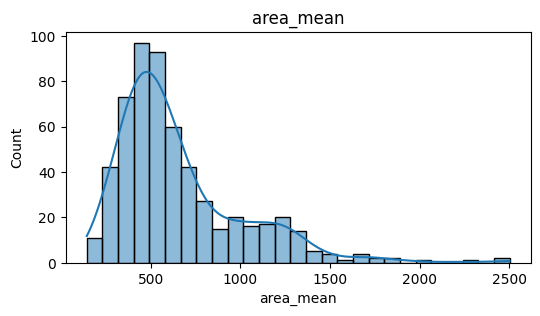

In [8]:
plt.figure(figsize=(6,3))
sns.histplot(df["area_mean"], kde=True)
plt.title("area_mean")
plt.show()

In [ ]:
# EDA
# PRE PROCESSING
# FEATURE ENG
# X & Y
# TRAIN TEST SPLIT
# SCALING
# MODEL TRAINING
# -----------------------------SKLEARN LIABRARY-----------------------------
x = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(381, 32) (188, 32) (381,) (188,)


In [14]:
# before training the model, we need to scale the data ( STANDARD SCALER )
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# x_train_scaled.shape, x_test_scaled.shape

r:\python\btech\venv\Lib\site-packages\sklearn\utils\extmath.py:1207: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
r:\python\btech\venv\Lib\site-packages\sklearn\utils\extmath.py:1212: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
r:\python\btech\venv\Lib\site-packages\sklearn\utils\extmath.py:1236: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [15]:
x_train_scaled.shape, x_test_scaled.shape

((381, 32), (188, 32))

In [ ]:
# FIT & TRANSFORM
# fit - calculates mean and std of the data
# transform -applied learned parameters
# Low variance threshold 
